Challenge

Tu vas reprendre ton notebook de la quête précédente, et réaliser 4 WordCloud différents :

Un WordCloud à partir du texte initial, grâce à la méthode generate_from_text

Un WordCloud grâce à la méthode generate_from_frequencies après nettoyage des stopwords et de la ponctuation.

Un WordCloud grâce à la méthode generate_from_frequencies après nettoyage des stopwords et de la ponctuation, et application d'un stemmer.

Un WordCloud grâce à la méthode generate_from_frequencies après nettoyage des stopwords et de la ponctuation, et application d'un lemmatizer.

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


text = """ Title: From Kitchen to Community: Local Pop-Up Dinners Bring Neighbors Together. In the heart of Portland, something special is simmering — and it’s not just dinner. A local initiative, Plates of the World, is using food to bring communities closer, one pop-up dinner at a time. Launched earlier this year by food enthusiast and community organizer Maya Jensen, the project invites immigrants and locals to cook and share traditional meals together in rotating neighborhood venues. From homemade Ethiopian injera to fragrant Vietnamese pho, each event is a celebration of culture, connection, and cuisine. Food is a universal language, says Maya. You don’t have to speak the same words to enjoy a meal together. The idea began when Maya hosted a small dinner at her apartment, featuring dishes from her Mexican neighbor and her friend’s Syrian aunt. The laughter, stories, and friendships that blossomed around the table inspired her to scale up the idea. Now, every two weeks, Plates of the World pops up in community centers, backyards, and even laundromats, transforming ordinary spaces into hubs of joy. The meals are pay-what-you-can, and all proceeds go toward supporting local refugee families and food access programs. Volunteers help with setup, translation, and even provide live music, turning each evening into a true cultural experience. Attendees come for the food but leave with new friends and perspectives. It’s not just about eating, says one guest, Thomas Nguyen. It’s about learning, laughing, and realizing how much we all have in common. With growing attendance and support from local businesses, Maya hopes to expand the program to other cities. For now, she’s just happy to see people breaking bread and breaking barriers. At a time when the world often feels divided, “Plates of the World” reminds us that unity might just start with a shared meal."""

# ---------- Prétraitement de base ----------
text_lower = text.lower()
words = word_tokenize(text_lower)
words = [word for word in words if word.isalpha()]
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# ---------- Stemming ----------
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]
freq_stemmed = FreqDist(stemmed_words)

# ---------- Lemmatizing ----------
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
freq_lemmatized = FreqDist(lemmatized_words)

# ---------- WordClouds ----------

def show_wordcloud_from_text(text):
    wc = WordCloud(width=480, height=480, max_font_size=200, min_font_size=10)
    wc.generate_from_text(text)
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.title("WordCloud - Texte Brut")
    plt.show()

def show_wordcloud_from_freq(freq_dist, title):
    wc = WordCloud(width=480, height=480, max_font_size=200, min_font_size=10)
    wc.generate_from_frequencies(freq_dist)
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.title(title)
    plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/solenedegrutere/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/solenedegrutere/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/solenedegrutere/nltk_data...


1. Wordclound texte intégral

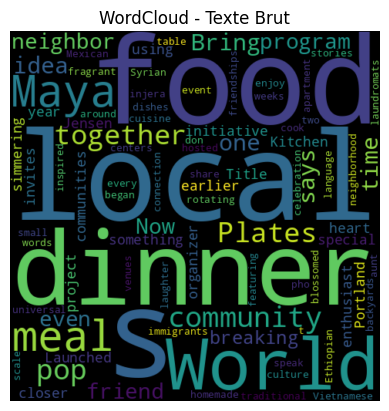

In [2]:
show_wordcloud_from_text(text)

2. WordCloud après nettoyage des stopwords et de la ponctuation.

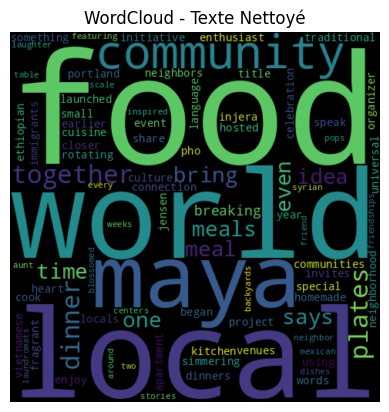

In [3]:
freq_filtered = FreqDist(filtered_words)
show_wordcloud_from_freq(freq_filtered, "WordCloud - Texte Nettoyé")

3. WordCloud après nettoyage des stopwords et de la ponctuation, et application d'un stemmer.

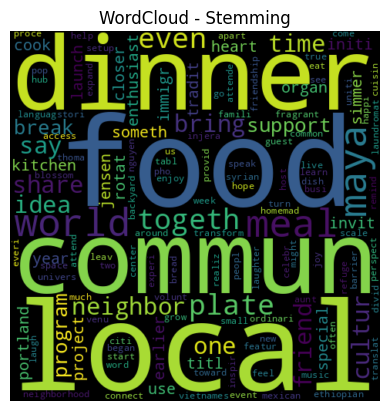

In [4]:
show_wordcloud_from_freq(freq_stemmed, "WordCloud - Stemming")

4. WordCloud après nettoyage des stopwords et de la ponctuation, et application d'un lemmatizer.

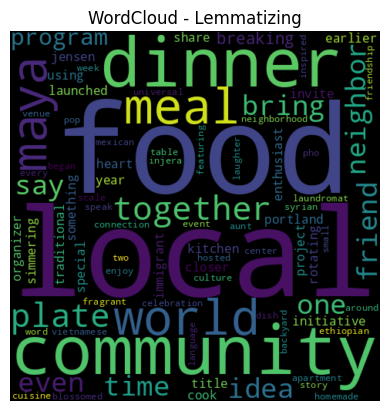

In [5]:
show_wordcloud_from_freq(freq_lemmatized, "WordCloud - Lemmatizing")